**K-Nearest Neighbour (KNN) Classification**

KNN bir lazy learning algoritmadır. Çünkü training aşamasına sahip değildir.

Sınıfı bilinmeyen verilerin, dataframedeki diğer veriler ile karşılaştırılıp uzaklıkları hesaplanarak, hesaplanan uzaklığa göre en uygun sınıfa atanarak sınıflandırılmasıdır.

İlk olarak bir k değeri seçilir.

Bu k değeri ile sınıfı belli olmayan noktanın etrafındaki en yakın kaç noktaya göre değerlendirme yapılacağı belirlenir.

Daha sonra bu noktanın komşu noktalara göre uzaklığı hesaplanır.

Hesaplanan uzaklıklara göre test edilen datanın ya da noktanın hangi sınıfa ait olduğu bulunur.

Uzaklık hesaplanırken **euclidean distance** kullanılır.

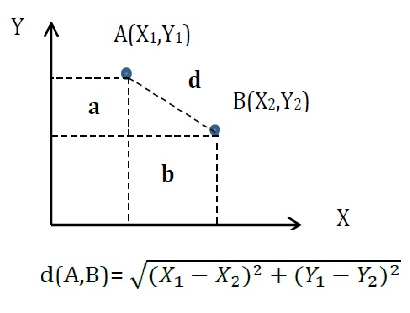

euclidean distance hesaplanırken önemli olan **normalization** yapmaktır. Çünkü datada bazı featurelar 1000-1500 değer aralığındayken, bazı featurelar 0.1 değer aralığındadır. Normalization yapılmazsa uzaklık hesaplanırken değeri yüksek olan datalar baskınlık kurar ve hesaplamada diğer dataların etkisi yokmuş gibi gözükür.

**(x-min(x))/(max(x)-min(x))** -> normalization formülü

normalization yapılarak tüm datalar 0-1 aralığına koyulur.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [3]:
data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data kanserin iyi huylu mu, kötü huylu mu olduğunu gösterir.

Diagnosis sütununda bulunan 'M' harfi malignant kötü huylu demektir.

'B' harfi benign iyi huylu tümör demektir.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Datada 569 sample bulunmaktadır.

33 sütun bulunmakta, bu sütunların 31 tanesi float değer, 1 tanesi integer değer, 1 tanesi de string değer bulundurmaktadır.

'Unnamed: 32' sütunundaki değerlerin hepsinin missing value olduğu görülür.

Model oluşturulurken 'id' ve 'Unnamed: 32' sütunları sınıflandırmada bir etkisi olmayacağından kullanılmayacaktır.

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

İyi huylu ve kötü huylu tümörün görselleştirilmesi için birbirinden ayrılması gerekir.

In [6]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

data.info() methodunda diagnosis sütununda 569 sample olduğu görülür.

In [8]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [9]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

iyi huylu ve kötü huylu tümör ayrıldığında 357 iyi huylu tümör, 212 kötü huylu tümör olduğu görülür.

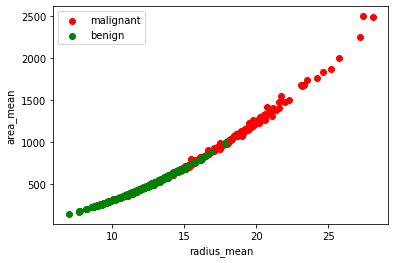

In [10]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="malignant")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="benign")
plt.legend() 
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

Kötü huylu tümörün alanının daha fazla olduğu görülür.

Plota bakıldığında gözle görülür bir ayrım söz konusudur. Bu durumda area_mean ve radius_mean featurelarını kullanarak classify yapılabilir.

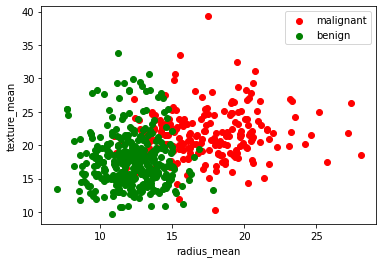

In [11]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

texture_mean ve radius_mean kullanılarak classify yapılacaktır.

In [12]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

In [13]:
y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.

In [14]:
x_data= data.iloc[:,1:3].values #radius_mean ve texture_mean feature olarak seçilir.

In [15]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [16]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [17]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors -> k değeri
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_head = knn.predict(x_test)
y_head

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

Bu yapılan prediction'ın yüzde kaçının doğru olduğunu bulmak için accuracy score'a bakılır.

In [19]:
print("when k is {}, accuracy of knn classification {} ".format(3,knn.score(x_test,y_test)))

when k is 3, accuracy of knn classification 0.8421052631578947 


k değeri 3 olduğunda, k-nearest neighbour algoritmasının yaptığı predictionların %84'ü doğrudur.

k değeri hyperparameter'dır. En uygun k değeri deneyerek bulunur.

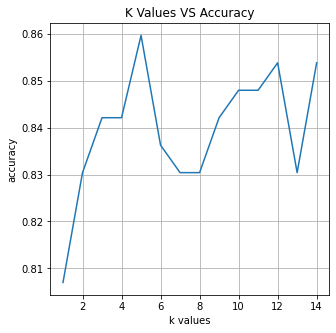

Best accuracy is 0.8596491228070176 with K = 5


In [20]:
# find k value
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K Values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

ilk 14 k değerinin accuracy hesabı plot edilmiştir.

Bu dataya göre k değeri 5 seçilmesi uygundur.

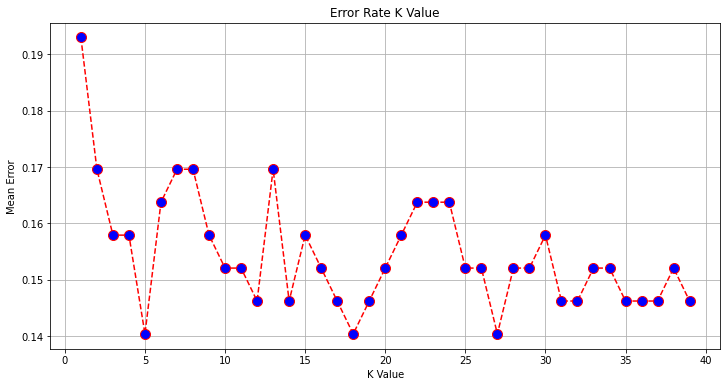

In [21]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

Mean error hesabına göre k değerlerine bakıldığında optimal k değeri 5'tir.

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

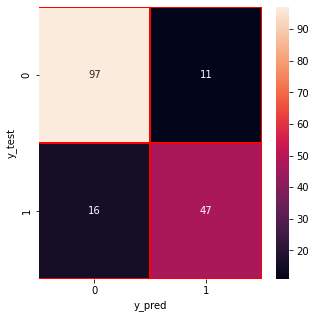

In [23]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

**Confusion Matrix**

**TN** **FP**

**FN** **TP**

Confusion matrix'e bakarak; iyi huylu tümörde 108 sample'ın 97'sinin doğru tahmin edildiği, 11 sample'ın gerçekte iyi huylu tümör olup kötü huylu tümör olarak yanlış tahmin edildiği,

kötü huylu tümörde 63 sample'ın 47'sinin doğru tahmin edildiği, 16 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.